In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import requests
from bs4 import BeautifulSoup
import json
import random
from highlight_text import htext
import os
from mplsoccer.pitch import Pitch

In [2]:
print(os.getcwd())

/Users/rao/Desktop/Football_Data


In [3]:
df = pd.read_csv(r'//Users/rao/Desktop/Football_Data/match_data/2021_data/LaLiga/Barca_Elche.csv')
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId', 'qualifiers/0/type/value',
       'qualifiers/0/type/displayName', 'qualifiers/0/value',
       'qualifiers/1/type/value', 'qualifiers/1/type/displayName',
       'qualifiers/1/value', 'qualifiers/2/type/value',
       'qualifiers/2/type/displayName', 'qualifiers/2/value',
       'qualifiers/3/type/value', 'qualifiers/3/type/displayName',
       'qualifiers/3/value', 'qualifiers/4/type/value',
       'qualifiers/4/type/displayName', 'qualifiers/4/value',
       'satisfiedEventsTypes/0', 'satisfiedEventsTypes/1',
       'satisfiedEventsTypes/2', 'satisfiedEventsTypes/3',
       'satisfiedEventsTypes/4', 'satisfiedEventsTypes/5',
       'satisfiedEventsTypes/6', 'endX', 'endY', 'qualifiers/5/type/value',
       'qualifiers/5/type/displayName', 'q

In [5]:
df = df[['teamId', 'playerId', 'minute', 'second', 'x', 'y','endX', 'endY', 'type/displayName','outcomeType/displayName']]
df = df[df['teamId'] == 65]
df = df[df['type/displayName'] == 'Pass']

In [6]:
df

,teamId,playerId,minute,second,x,y,endX,endY,type/displayName,outcomeType/displayName
8,65,80774.0,0,21.0,14.2,56.0,26.1,79.7,Pass,Successful
9,65,89931.0,0,25.0,25.9,75.7,21.2,38.6,Pass,Successful
10,65,12712.0,0,28.0,27.0,34.9,33.5,33.1,Pass,Successful
11,65,279423.0,0,32.0,36.6,40.4,38.1,74.5,Pass,Successful
12,65,89931.0,0,37.0,44.1,73.5,36.6,43.4,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1699,65,11119.0,92,35.0,76.8,31.6,85.4,24.1,Pass,Successful
1700,65,80241.0,92,37.0,84.8,24.9,90.5,44.6,Pass,Successful
1709,65,236511.0,92,48.0,54.6,32.7,53.4,30.6,Pass,Unsuccessful
1712,65,44721.0,92,53.0,65.1,23.6,67.7,12.8,Pass,Successful


In [10]:
p_successful = df[df['outcomeType/displayName'] == 'Successful']
p_unsuccessful = df[df['outcomeType/displayName'] == 'Unsuccessful']

In [12]:
p_successful

,teamId,playerId,minute,second,x,y,endX,endY,type/displayName,outcomeType/displayName
8,65,80774.0,0,21.0,14.2,56.0,26.1,79.7,Pass,Successful
9,65,89931.0,0,25.0,25.9,75.7,21.2,38.6,Pass,Successful
10,65,12712.0,0,28.0,27.0,34.9,33.5,33.1,Pass,Successful
11,65,279423.0,0,32.0,36.6,40.4,38.1,74.5,Pass,Successful
12,65,89931.0,0,37.0,44.1,73.5,36.6,43.4,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1697,65,402197.0,92,25.0,35.1,56.4,46.5,73.0,Pass,Successful
1698,65,279423.0,92,29.0,50.7,72.3,55.6,48.8,Pass,Successful
1699,65,11119.0,92,35.0,76.8,31.6,85.4,24.1,Pass,Successful
1700,65,80241.0,92,37.0,84.8,24.9,90.5,44.6,Pass,Successful


## Plotting all passes

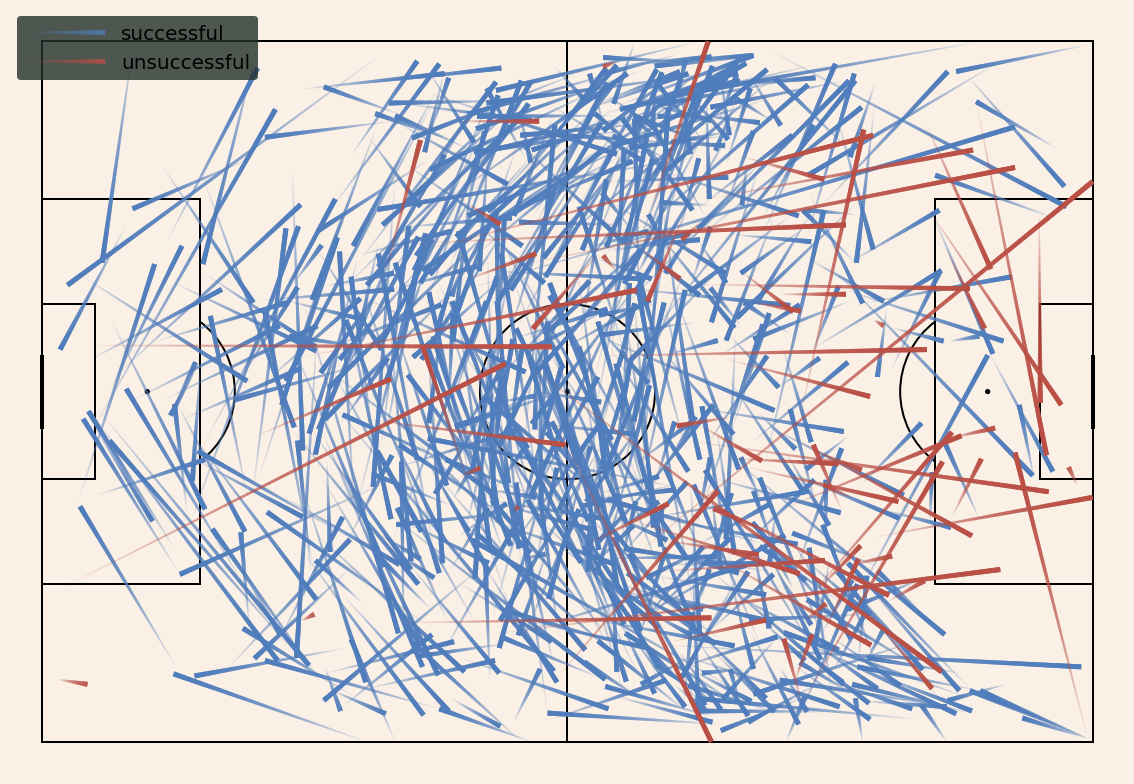

In [25]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='linen', line_color='black', figsize=(16, 11),
              constrained_layout=False, tight_layout=True)
fig, ax = pitch.draw()

# Plot the completed passes
lc1 = pitch.lines(1.2*p_successful.x, 0.8*p_successful.y,
                  1.2*p_successful.endX, 0.8*p_successful.endY,
                  lw=5, transparent=True, comet=True, label='successful',
                  color='#507dbc', ax=ax)

# Plot the other passes
lc2 = pitch.lines(1.2*p_unsuccessful.x, 0.8*p_unsuccessful.y,
                  1.2*p_unsuccessful.endX, 0.8*p_unsuccessful.endY,
                  lw=5, transparent=True, comet=True, label='unsuccessful',
                  color='#ba4f45', ax=ax)
# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the figure facecolor
fig.set_facecolor('linen')
    

## Plotting individual player passes

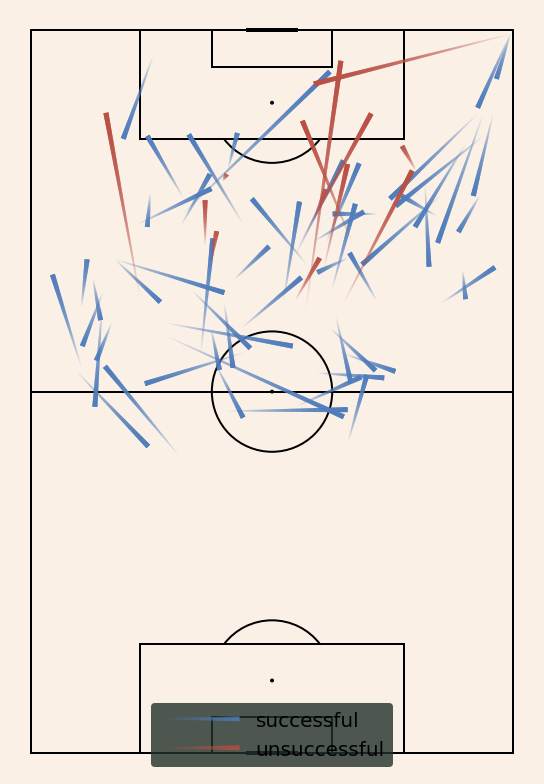

In [26]:
def p_player(player) :
    
    p_suc = p_successful[p_successful['playerId'] == player]
    p_unsuc = p_unsuccessful[p_unsuccessful['playerId'] == player]
    
    pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='linen', line_color='black', figsize=(16, 11),
              constrained_layout=False, tight_layout=True)
    fig, ax = pitch.draw()

    # Plot the completed passes
    lc1 = pitch.lines(1.2*p_suc.x, 0.8*p_suc.y,
                      1.2*p_suc.endX, 0.8*p_suc.endY,
                      lw=5, transparent=True, comet=True, label='successful',
                      color='#507dbc', ax=ax)

    # Plot the other passes
    lc2 = pitch.lines(1.2*p_unsuc.x, 0.8*p_unsuc.y,
                      1.2*p_unsuc.endX, 0.8*p_unsuc.endY,
                      lw=5, transparent=True, comet=True, label='unsuccessful',
                      color='#ba4f45', ax=ax)
    # Plot the legend
    ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='lower center', handlelength=4)

    # Set the figure facecolor
    fig.set_facecolor('linen')
    
p_player(11119)